## Cross-Classifying by More than One Variable 
When individuals have multiple features, there are many different ways to classify them. For example, if we have a population of college students for each of whom we have recorded a major and the number of years in college, then the students could be classified by major, or by year, or by a combination of major and year.

Two Variables: Counting the Number in Each Paired Category 
The table more_cones records the flavor, color, and price of six ice cream cones.

In [3]:
import pandas as pd
import numpy as np

In [4]:
more_cones = pd.DataFrame({
    'Flavor': ('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color': ('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price': (3.55, 4.75, 5.25, 5.25, 5.25, 4.75)    
})

more_cones

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


In [5]:
more_cones.groupby('Flavor')[['Flavor']].count().rename(columns={
    'Flavor': 'count'
}).reset_index()

,Flavor,count
0,bubblegum,1
1,chocolate,3
2,strawberry,2


But now each cone has a color as well. To classify the cones by both flavor and color, we will pass a list of labels as an argument to group. The resulting table has one row for every unique combination of values that appear together in the grouped columns. As before, a single argument (a list, in this case, but an array would work too) gives row counts.

Although there are six cones, there are only four unique combinations of flavor and color. Two of the cones were dark brown chocolate, and two pink strawberry.

In [6]:
more_cones.groupby(['Flavor', 'Color'])[['Flavor']].count().rename(columns={
    'Flavor': 'count'
}).reset_index()

,Flavor,Color,count
0,bubblegum,pink,1
1,chocolate,dark brown,2
2,chocolate,light brown,1
3,strawberry,pink,2


Two Variables: Finding a Characteristic of Each Paired Category 
A second argument aggregates all other columns that are not in the list of grouped columns.

In [28]:
M=more_cones.groupby(['Flavor', 'Color'])[['Price']].sum().rename(columns={
    'Price': 'Price sum'
}).reset_index()
M

,Flavor,Color,Price sum
0,bubblegum,pink,4.75
1,chocolate,dark brown,10.50
2,chocolate,light brown,4.75
3,strawberry,pink,8.80


In [ ]:
Three or More Variables. You can use group to classify rows by three or more categorical variables. Just include them all in the list that is the first argument. But cross-classifying by multiple variables can become complex, as the number of distinct combinations of categories can be quite large.

Pivot Tables: Rearranging the Output of group 
Many uses of cross-classification involve just two categorical variables, like Flavor and Color in the example above. In these cases it is possible to display the results of the classification in a different kind of table, called a pivot table. Pivot tables, also known as contingency tables, make it easier to work with data that have been classified according to two variables.

Recall the use of group to count the number of cones in each paired category of flavor and color:

In [17]:
Q=more_cones.groupby(['Flavor', 'Color'])[['Price']].count().rename(columns={
    'Price': 'Count'
}).reset_index()
Q

,Flavor,Color,Count
0,bubblegum,pink,1
1,chocolate,dark brown,2
2,chocolate,light brown,1
3,strawberry,pink,2


The same data can be displayed differenly using the Table method pivot. Ignore the code for a moment, and just examine the table of outcomes.

In [30]:
p=Q.pivot(index='Color', columns='Flavor',values='Count').fillna(0)
p

Flavor,bubblegum,chocolate,strawberry
Color,,,
dark brown,0.0,2.0,0.0
light brown,0.0,1.0,0.0
pink,1.0,0.0,2.0


## pivot

The pivot method is closely related to the group method: it groups together rows that share a combination of values. It differs from group because it organizes the resulting values in a grid. The first argument to pivot is the label of a column that contains the values that will be used to form new columns in the result. The second argument is the label of a column used for the rows. The result gives the count of all rows of the original table that share the combination of column and row values.

Like group, pivot can be used with additional arguments to find characteristics of each paired category. An optional third argument called values indicates a column of values that will replace the counts in each cell of the grid. All of these values will not be displayed, however; the fourth argument collect indicates how to collect them all into one aggregated value to be displayed in the cell.

An example will help clarify this. Here is pivot being used to find the total price of the cones in each cell.

In [31]:
p=M.pivot(index='Color', columns='Flavor',values='Price sum').fillna(0)
p

Flavor,bubblegum,chocolate,strawberry
Color,,,
dark brown,0.00,10.50,0.0
light brown,0.00,4.75,0.0
pink,4.75,0.00,8.8


And here is group doing the same thing.

In [32]:
more_cones.groupby(['Flavor', 'Color'])[['Price']].sum().rename(columns={
    'Price': 'Price sum'
}).reset_index()

,Flavor,Color,Price sum
0,bubblegum,pink,4.75
1,chocolate,dark brown,10.50
2,chocolate,light brown,4.75
3,strawberry,pink,8.80


Example: Education and Income of Californian Adults 
The State of California's Open Data Portal is a rich source of information about the lives of Californians. It is our source of a dataset on educational attainment and personal income among Californians over the years 2008 to 2014. The data are derived from the U.S. Census Current Population Survey.

For each year, the table records the Population Count of Californians in many different combinations of age, gender, educational attainment, and personal income. We will study only the data for the year 2014.

In [40]:
full_table=pd.read_csv("educ_inc.csv")
full_table

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
4,1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,1/1/14 0:00,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,1/1/14 0:00,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [42]:

ca_2014 = full_table[(full_table['Year'] == '1/1/14 0:00') & (full_table['Age'] != '00 to 17')].reset_index(drop=True)
ca_2014

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/14 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
1,1/1/14 0:00,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
2,1/1/14 0:00,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
3,1/1/14 0:00,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
4,1/1/14 0:00,65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
...,...,...,...,...,...,...
122,1/1/14 0:00,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
123,1/1/14 0:00,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
124,1/1/14 0:00,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
125,1/1/14 0:00,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


ach row of the table corresponds to a combination of age, gender, educational level, and income. There are 127 such combinations in all!

As a first step it is a good idea to start with just one or two variables. We will focus on just one pair: educational attainment and personal income.

In [43]:
educ_inc= ca_2014[['Educational Attainment','Personal Income','Population Count']]
educ_inc

,Educational Attainment,Personal Income,Population Count
0,No high school diploma,"H: 75,000 and over",2058
1,No high school diploma,"H: 75,000 and over",2153
2,No high school diploma,"G: 50,000 to 74,999",4666
3,High school or equivalent,"H: 75,000 and over",7122
4,No high school diploma,"F: 35,000 to 49,999",7261
...,...,...,...
122,High school or equivalent,"A: 0 to 4,999",670294
123,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
124,No high school diploma,"A: 0 to 4,999",723208
125,Bachelor's degree or higher,"H: 75,000 and over",953282


Let's start by looking at educational level alone. The categories of this variable have been subdivided by the different levels of income. So we will group the table by Educational Attainment and sum the Population Count in each category.

In [45]:
education = educ_inc[['Educational Attainment', 'Population Count']]
educ_totals = education.groupby('Educational Attainment')[['Population Count']].sum().rename(columns={
    'Population Count': 'Population Count sum'
}).reset_index()
educ_totals

,Educational Attainment,Population Count sum
0,Bachelor's degree or higher,8525698
1,"College, less than 4-yr degree",7775497
2,High school or equivalent,6294141
3,No high school diploma,4258277


There are only four categories of educational attainment. The counts are so large that is is more helpful to look at percents. For this, we will use the function percents that we defined in an earlier section. It converts an array of numbers to an array of percents out of the total in the input array.

In [46]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

We now have the distribution of educational attainment among adult Californians. More than 30% have a Bachelor's degree or higher, while almost 16% lack a high school diploma.

In [68]:
educ_distribution = educ_totals.copy()
educ_distribution['Population Percent'] = percents(educ_totals['Population Count sum'])
educ_distribution

,Educational Attainment,Population Count sum,Population Percent
0,Bachelor's degree or higher,8525698,31.75
1,"College, less than 4-yr degree",7775497,28.96
2,High school or equivalent,6294141,23.44
3,No high school diploma,4258277,15.86


By using pivot, we can get a contingency table (a table of counts) of adult Californians cross-classified by Educational Attainment and Personal Income.

In [73]:
totals = educ_inc.pivot_table(values='Population Count', index='Personal Income', columns = 'Educational Attainment', aggfunc='sum')
totals

Educational Attainment,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
Personal Income,,,,
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


Here you see the power of pivot over other cross-classification methods. Each column of counts is a distribution of personal income at a specific level of educational attainment. Converting the counts to percents allows us to compare the four distributions.

In [74]:
distributions = totals.copy()
distributions["Bachelor's degree or higher"] = percents(totals["Bachelor's degree or higher"])
distributions['College, less than 4-yr degree'] = percents(totals['College, less than 4-yr degree'])
distributions['High school or equivalent'] = percents(totals['High school or equivalent'])
distributions['No high school diploma'] = percents(totals['No high school diploma'])

distributions

Educational Attainment,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
Personal Income,,,,
"A: 0 to 4,999",6.75,12.67,18.46,28.29
"B: 5,000 to 9,999",3.82,10.43,9.95,14.02
"C: 10,000 to 14,999",5.31,10.27,11.00,15.61
"D: 15,000 to 24,999",9.07,17.30,19.90,20.56
"E: 25,000 to 34,999",8.14,14.04,14.76,10.91
"F: 35,000 to 49,999",13.17,14.31,12.44,6.12
"G: 50,000 to 74,999",18.70,11.37,8.35,3.11
"H: 75,000 and over",35.03,9.62,5.13,1.38


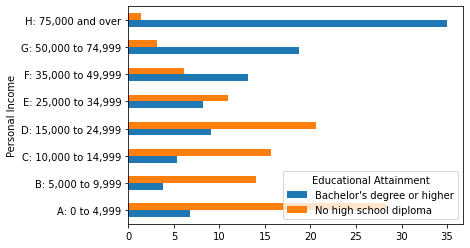

In [76]:
distributions.iloc[:,[0,3]].plot.barh()
